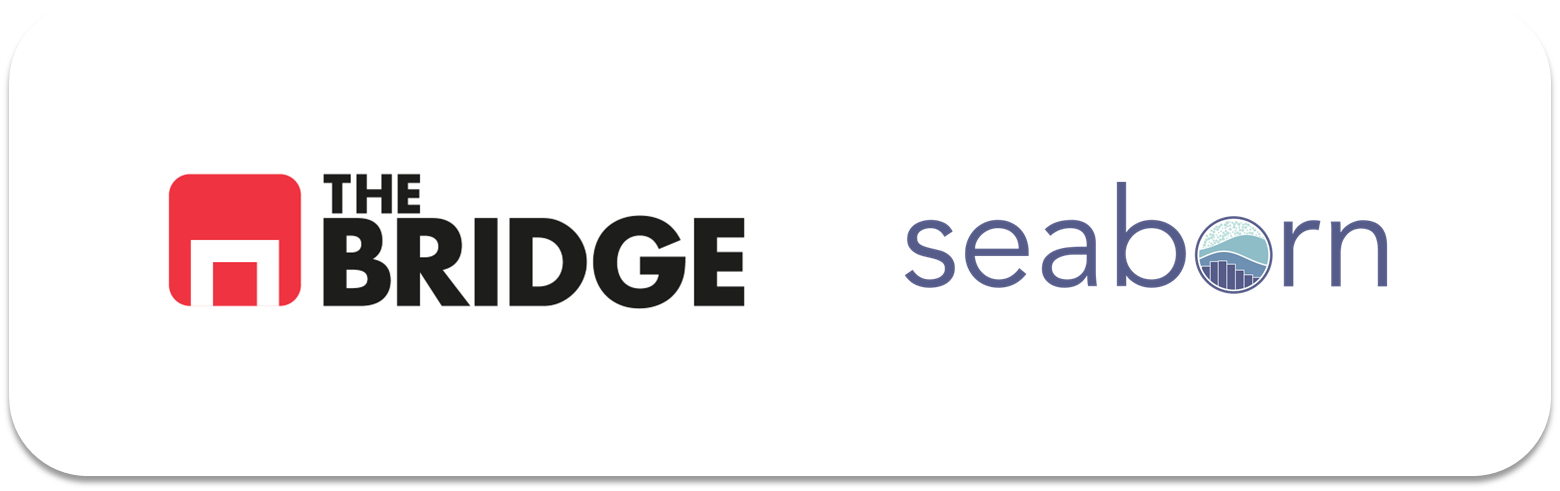

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df = pd.read_csv('./data/california_cities.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [4]:
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [ ]:
def dispersion(df, col_x, col_y, col_category=None, col_size=None, scale=1, show_legend=True):
    plt.figure(figsize=(20, 10))  

    if isinstance(col_size, str):
        sizes = df[col_size] * scale
    else:
        sizes = col_size if col_size else 50  

    dispersar = sns.scatterplot(
        data=df, 
        x=col_x, 
        y=col_y,
        hue=None,  
        color='green',  
        size=sizes if isinstance(sizes, pd.Series) else None,
        legend=show_legend,
        sizes=(10, 200)
    )
    
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f"Diagrama de dispersión: {col_x} vs {col_y}")
    
    # Ajustar leyenda
    if not show_legend and dispersar.legend_ is not None:
        dispersar.legend_.remove()
    
    plt.show()



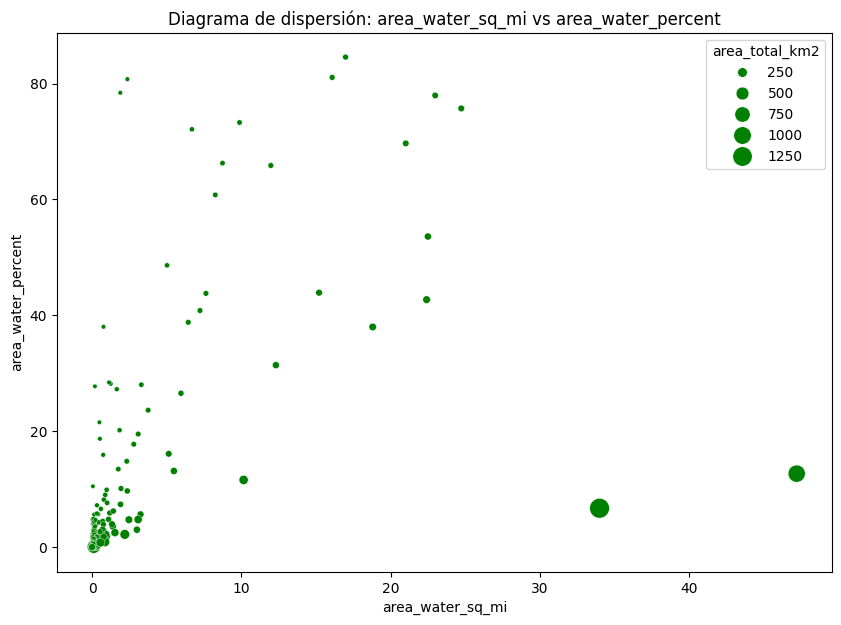

In [6]:
# Ejemplo:
dispersion( df=df, col_x="area_water_sq_mi",   col_y="area_water_percent",  col_category="area_water_km2",  col_size="area_total_km2",  scale=1,  show_legend=True) 

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

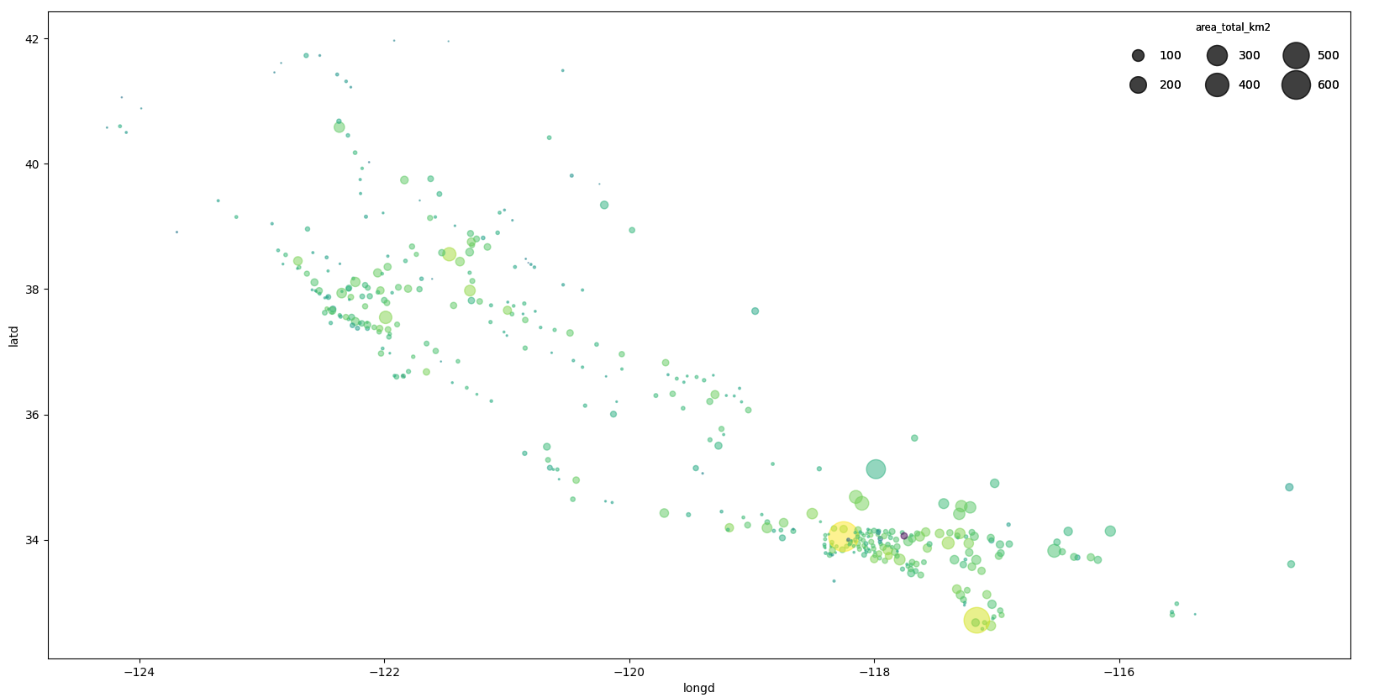

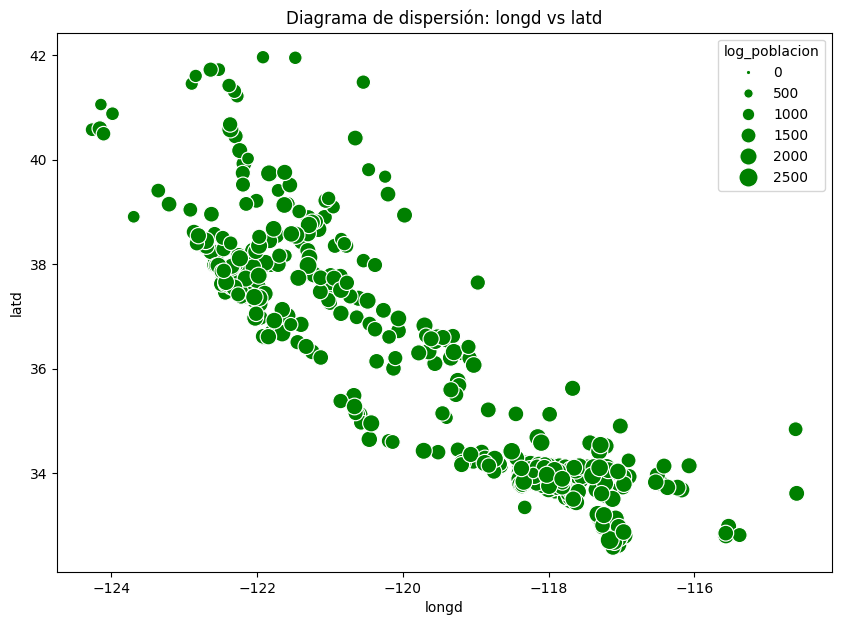

In [8]:
df["log_poblacion"] = np.log10(df["population_total"])
dispersion(df, "longd", "latd","area_total_km2","log_poblacion", 400)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [24]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


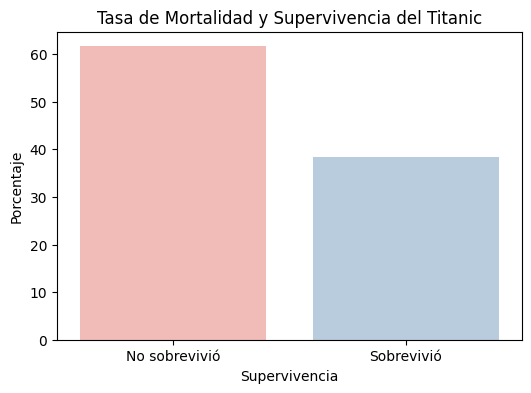

In [ ]:
# Tasa de mortalidad alta
mortalidad = df_titanic['survived'].value_counts(normalize=True) * 100  # Convertimos la proporción a porcentaje

plt.figure(figsize=(6, 4))
sns.barplot(x=mortalidad.index, y=mortalidad.values, palette='Pastel1', hue=mortalidad.index.astype(str), legend=False)
plt.title("Tasa de Mortalidad y Supervivencia del Titanic")
plt.xlabel("Supervivencia")  # Cambié el nombre de la etiqueta
plt.ylabel("Porcentaje")  # Etiqueta del eje Y en porcentaje
plt.xticks([0, 1], ['No sobrevivió', 'Sobrevivió'])  # Etiquetas de los valores 0 y 1
plt.show()

<Figure size 800x500 with 0 Axes>

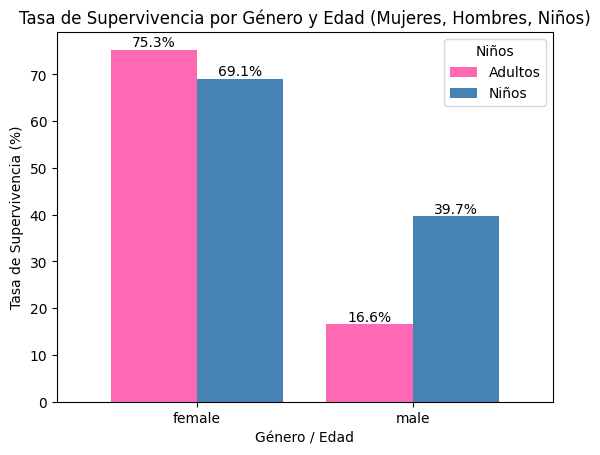

In [ ]:
# Calcular tasas de supervivencia por género y edad (niños)
df_titanic['child'] = df_titanic['age'] < 18  
supervivencia_por_genero_edad = df_titanic.groupby(['sex', 'child'])['survived'].mean().unstack() * 100  

# Gráfico de barras agrupadas
plt.figure(figsize=(8, 5))
ax = supervivencia_por_genero_edad.plot(kind='bar', color=['#FF69B4', '#4682B4'], width=0.8)  # Usamos colores rosa y azul

# Añadir valores en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato de porcentaje con una decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del valor
                fontsize=10, ha='center', va='center', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Tasa de Supervivencia por Género y Edad (Mujeres, Hombres, Niños)")
plt.xlabel("Género / Edad")
plt.ylabel("Tasa de Supervivencia (%)")  
plt.xticks(rotation=0)
plt.legend(title="Niños", labels=["Adultos", "Niños"])
plt.show()



C:\Users\mario\AppData\Local\Temp\ipykernel_15516\3887644666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=supervivencia_por_clase.index, y=supervivencia_por_clase.values, palette='Set2')  # Paleta Set2


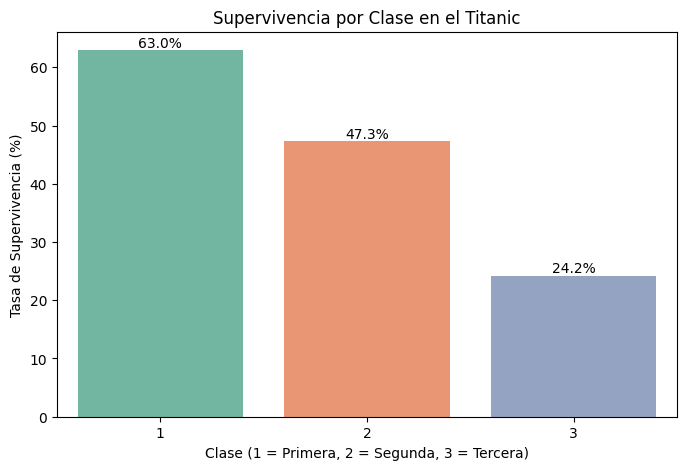

In [40]:
# Supervivencia por clase
supervivencia_por_clase = df_titanic.groupby('pclass')['survived'].mean() * 100  # Convertir a porcentaje

# Gráfico de barras para la supervivencia por clase
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=supervivencia_por_clase.index, y=supervivencia_por_clase.values, palette='Set2')  # Paleta Set2

# Añadir valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato de porcentaje con una decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del valor
                fontsize=10, ha='center', va='center', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Supervivencia por Clase en el Titanic")
plt.xlabel("Clase (1 = Primera, 2 = Segunda, 3 = Tercera)")
plt.ylabel("Tasa de Supervivencia (%)")  # Etiqueta en porcentaje
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_15516\145533421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=supervivencia_por_grupo.index, y=supervivencia_por_grupo.values, palette='Set1')  # Colores para cada grupo


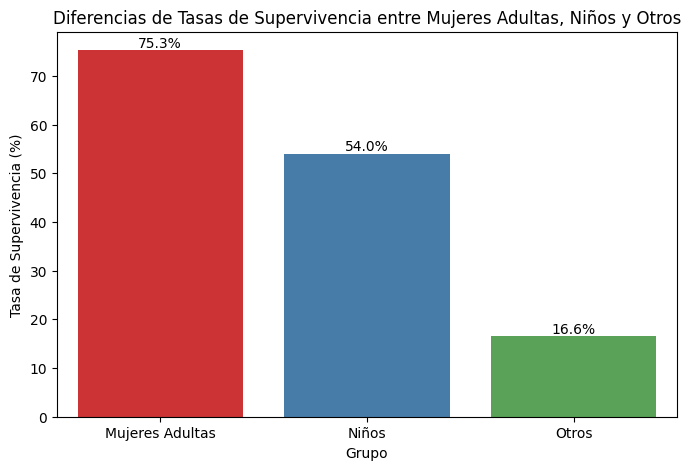

In [42]:
# Crear una columna para identificar a las mujeres adultas y a los niños
df_titanic['female_adult'] = (df_titanic['sex'] == 'female') & (df_titanic['child'] == False)
df_titanic['child'] = df_titanic['age'] < 18  # Asegurar que 'child' esté correctamente definida

# Agrupar por las nuevas categorías: mujeres adultas, niños, otros
df_titanic['group'] = np.where(df_titanic['female_adult'], 'Mujeres Adultas', 
                               np.where(df_titanic['child'], 'Niños', 'Otros'))

# Calcular la tasa de supervivencia para cada grupo
supervivencia_por_grupo = df_titanic.groupby('group')['survived'].mean() * 100  # Convertir a porcentaje

# Graficar las tasas de supervivencia
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=supervivencia_por_grupo.index, y=supervivencia_por_grupo.values, palette='Set1')  # Colores para cada grupo

# Añadir valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato de porcentaje con una decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del valor
                fontsize=10, ha='center', va='center', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Diferencias de Tasas de Supervivencia entre Mujeres Adultas, Niños y Otros")
plt.xlabel("Grupo")
plt.ylabel("Tasa de Supervivencia (%)")  # Etiqueta en porcentaje
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_15516\1607302954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=supervivencia_por_embarque.index, y=supervivencia_por_embarque.values, palette='Set3')
C:\Users\mario\AppData\Local\Temp\ipykernel_15516\1607302954.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=supervivencia_por_clase.index, y=supervivencia_por_clase.values, palette='Set2')


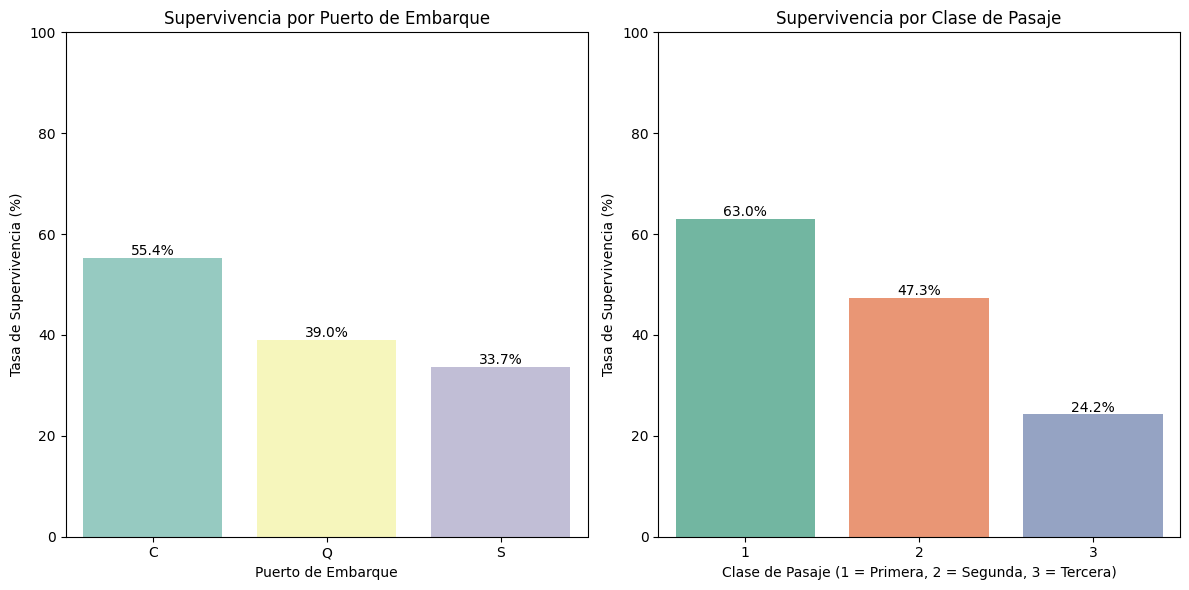

In [45]:
supervivencia_por_embarque = df_titanic.groupby('embarked')['survived'].mean() * 100  


supervivencia_por_clase = df_titanic.groupby('pclass')['survived'].mean() * 100 


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=supervivencia_por_embarque.index, y=supervivencia_por_embarque.values, palette='Set3')
plt.title("Supervivencia por Puerto de Embarque")
plt.xlabel("Puerto de Embarque")
plt.ylabel("Tasa de Supervivencia (%)")
ax1.set_ylim(0, 100)  

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 fontsize=10, ha='center', va='center', color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=supervivencia_por_clase.index, y=supervivencia_por_clase.values, palette='Set2')
plt.title("Supervivencia por Clase de Pasaje")
plt.xlabel("Clase de Pasaje (1 = Primera, 2 = Segunda, 3 = Tercera)")
plt.ylabel("Tasa de Supervivencia (%)")
ax2.set_ylim(0, 100)  

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%',  
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 fontsize=10, ha='center', va='center', color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
